In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

going back to first principles here. input some data, and make it into a plot. this plot is obviously meaningless. Everyone already knows that Harry is lame. 

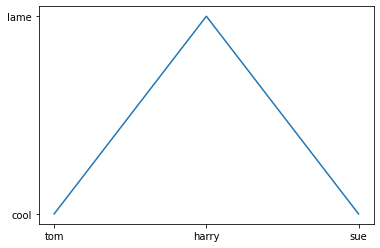

In [2]:
x = np.array(['tom', 'harry', 'sue'])
y = np.array(['cool', 'lame', 'cool'])
plt.plot(x, y)
plt.show()

wasnt sure here how it determined the Y axis positioning. Thought maybe it was alphabetical, but by switching the values for the people we see that the chart changes. So I think that for non-numerical items, it plots the first y value based on the first x value. 

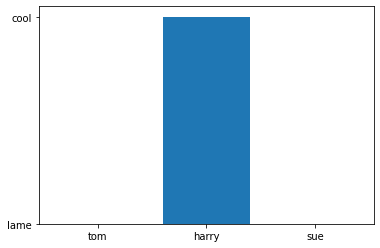

In [3]:
x = np.array(['tom', 'harry', 'sue'])
y = np.array(['lame', 'cool', 'lame'])
plt.bar(x, y)
plt.show()

here I am exploring a few of the text related options. 

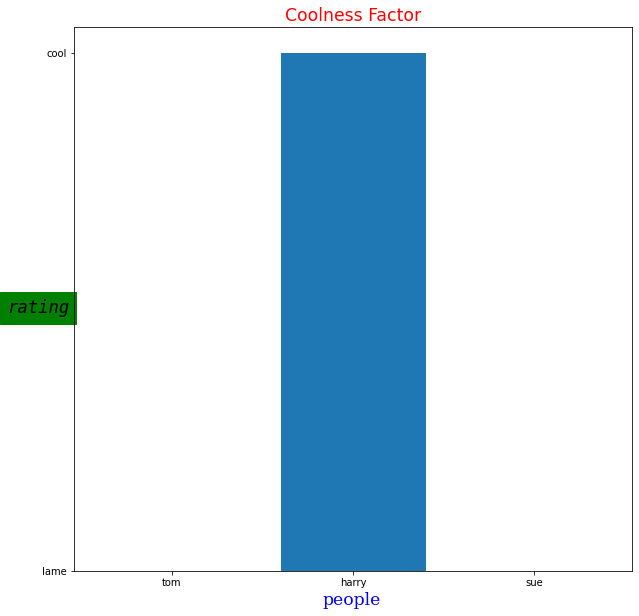

In [4]:
plt.figure(figsize=(10,10))
x = np.array(['tom', 'harry', 'sue'])
y = np.array(['lame', 'cool', 'lame'])
plt.bar(x, y)
plt.title('Coolness Factor', size='xx-large', c='r')
plt.xlabel('people', ha='right', family='serif', size='xx-large', fontstretch='ultra-expanded', x=.55, y=15, c='b')
plt.ylabel('rating', va='top', backgroundcolor='g', family='monospace', size='xx-large', fontstretch='ultra-expanded', style='italic', rotation='horizontal')
plt.show()

next going to fart around with making multiple graphs on one chart.

(array([1., 0., 1., 2., 0., 2., 1., 2., 0., 1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

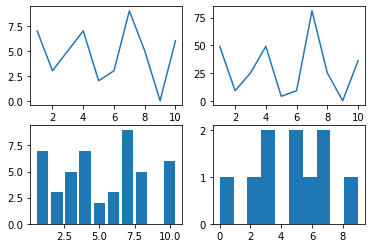

In [5]:
x=np.array([1,2,3,4,5,6,7,8,9,10])
y=np.array([7,3,5,7,2,3,9,5,0,6])

fig=plt.figure()
f1 = fig.add_subplot(2,2,1)
f2 = fig.add_subplot(2,2,2)
f3 = fig.add_subplot(2,2,3)
f4 = fig.add_subplot(2,2,4)
f1.plot(x,y)
f2.plot(x,(y**2))
f3.bar(x,y)
f4.hist(y)

One of the variables that I was going to play around with was weight, but as I plotted it, I discovered that there was a missing value for one of the players weight so I would be unable to chart against other variables. To get around that I created a new dataframe called 'weights' that doesnt have that player. All the other variables are the same. 

In [6]:
wnba = pd.read_csv('wnba.csv')
weights = wnba[wnba['Weight'].notnull()]
weights.head()


,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


again, playing around with multiple axes on one figure, this time using histograms across height, weight and points scored.

(array([30., 24., 17., 20., 17.,  8., 10.,  8.,  4.,  5.]),
 array([  2. ,  60.2, 118.4, 176.6, 234.8, 293. , 351.2, 409.4, 467.6,
        525.8, 584. ]),
 <a list of 10 Patch objects>)

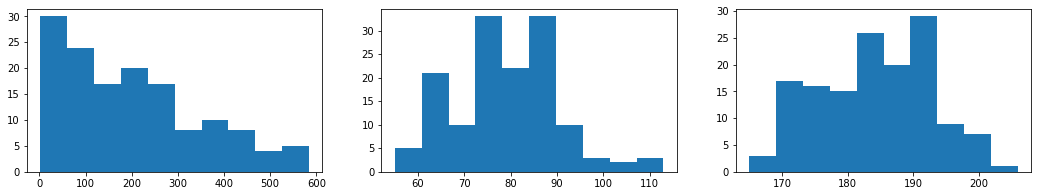

In [7]:
fig = plt.figure(figsize=(18,3))
pts = fig.add_subplot(1,3,1)
weight =  fig.add_subplot(1,3,2)
height = fig.add_subplot(1,3,3)
height.hist(wnba['Height'])
weight.hist(weights['Weight'])
pts.hist(wnba['PTS'])


another multiple plot situation, this time using different colors to differentiate the comparisons. It took me some time to figure out how to use the kernal density estimation as an axes object. Initially I could only plot it as a figure object and it just showed up in the 4th subplot. Then I figured out two ways to do what I wanted to do. First, I could plot is a figure object using the Seaborn function `.kdeplot()` and then use the ax argument to call out the subplot I wanted to use and turn the plot into an axes object. Second, I went back to using the `.kde()` function for the data I wanted to plot, but then used the same method of calling out the axes I wanted to use as an argument in the function. Both methods work, but one required me to import seaborn.

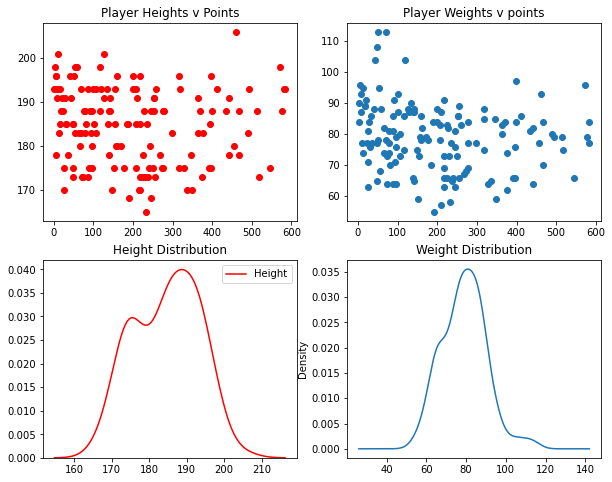

In [8]:
import seaborn as sns
fig = plt.figure(figsize=(10,8))
ph = fig.add_subplot(2,2,1)
pw = fig.add_subplot(2,2,2)
hkde = fig.add_subplot(2,2,3)
wkde = fig.add_subplot(2,2,4)
ph.scatter(wnba['PTS'], wnba['Height'], color='r')
pw.scatter(weights['PTS'], weights['Weight'])
sns.kdeplot(data=wnba['Height'], ax=hkde, color='r')
weights["Weight"].plot.kde(ax=wkde)
ph.set_title('Player Heights v Points')
pw.set_title('Player Weights v points')
hkde.set_title('Height Distribution')
wkde.set_title('Weight Distribution')
plt.show()

Here I put the three distributions that I was interested in (points, weight and height) on one graph by converting the kernal density estimations into z scores so that they could be compared on the same axes. We can see that weight and height distributions are similar in shape but the points distribution doesnt follow. I am not sure what we can conclude, if anything, from this chart though. I think that the scatter plots below are more illustrative.

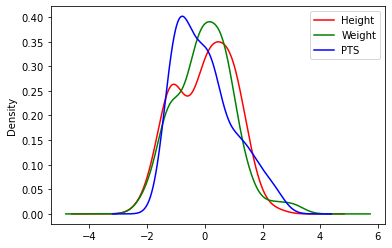

In [9]:
hstd= wnba['Height'].std()
hmean = wnba['Height'].mean()
def h_z(x):
    z = (x-hmean)/hstd
    return z
hzscores = wnba['Height'].apply(h_z)

wstd = weights['Weight'].std()
wmean = weights['Weight'].mean()
def w_z(x):
    z = (x-wmean)/wstd
    return z
wzscores = weights['Weight'].apply(w_z)

pstd= wnba['PTS'].std()
pmean = wnba['PTS'].mean()
def p_z(x):
    z = (x-pmean)/pstd
    return z
pzscores = wnba['PTS'].apply(p_z)

hzscores.plot.kde(color='r', legend=True)
wzscores.plot.kde(color='g', legend=True)
pzscores.plot.kde(color='b', legend=True)


playing around with plotting scatter graphs against each other.

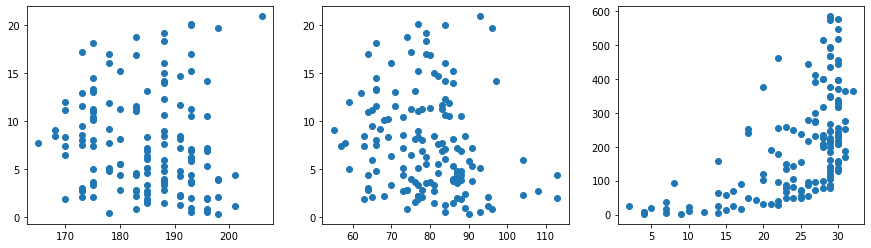

In [10]:
fig = plt.figure(figsize=(15,4))
hppgp = fig.add_subplot(1,3,1)
wppgp = fig.add_subplot(1,3,2)
ppgp = fig.add_subplot(1,3,3)
hppgp.scatter(x=wnba['Height'], y=wnba['PTS']/wnba['Games Played'])
wppgp.scatter(x=weights['Weight'], y=weights['PTS']/weights['Games Played'])
ppgp.scatter(x=wnba['Games Played'], y=wnba["PTS"])


With no real correlation between weight or height and points, I decided to look into games played, and minutes played. 

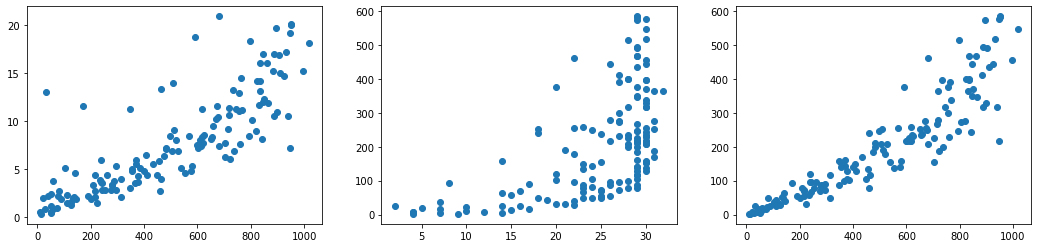

In [11]:
fig = plt.figure(figsize=(18,4))
one = fig.add_subplot(1,3,1)
two = fig.add_subplot(1,3,2)
tree = fig.add_subplot(1,3,3)
one.scatter(x=wnba['MIN'], y=wnba['PTS']/wnba['Games Played'])
two.scatter(y=wnba['PTS'], x=wnba['Games Played'])
tree.scatter(x=wnba['MIN'], y=wnba['PTS'])

As we can see here, the third graph comparing total points scored by player, and total minutes played by a player is really the first plot I have come across with any clear correlation. I  thought that using points per game would give us a tighter correlation value than it did, but I suppose that is because someone that plays one minute of each game is weighted the same as someone that plays every second of every game, thus reducing the grainularity. Minutes played gives us a better picture of the players ability to score given the actual opportunity they had in which to score. Below I created a new variable, points per minute. This metric might give us a better idea of how to compare players against one another. As we have seen a pretty direct correlation between minutes played and points scored. What if a star player was injured and had to sit out some games? This metric could help id

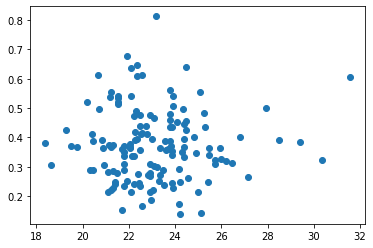

In [12]:
wnba['PPM'] = wnba['PTS'] / wnba['MIN']
plt.scatter(x=wnba['BMI'], y=wnba['PPM'])